# Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#regression
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
%matplotlib inline

#model selection
from sklearn.model_selection import train_test_split,cross_validate


#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score

# Loading  & Check the Shape of the data 



In [2]:
# read the data and display the first 5 rows
train_df = pd.read_csv('train_luc.csv', parse_dates=True, index_col='datetime')
test_df = pd.read_csv('test_luc.csv', parse_dates=True, index_col='datetime')

print("\nNumber of samples:",train_df.shape[0],"and number of features:",train_df.shape[1],"\n")
print("\nNumber of samples:",test_df.shape[0],"and number of features:",test_df.shape[1],"\n")


Number of samples: 9174 and number of features: 11 


Number of samples: 1712 and number of features: 8 



# Identify the Start and End Date range  from Train and Test Data

In [3]:
print(train_df.index[[0, -1]])
print(test_df.index[[0,-1]])

DatetimeIndex(['2011-01-01 00:00:00', '2012-12-16 23:00:00'], dtype='datetime64[ns]', name='datetime', freq=None)
DatetimeIndex(['2011-01-17 00:00:00', '2012-12-19 23:00:00'], dtype='datetime64[ns]', name='datetime', freq=None)


# Feature Data Types


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9174 entries, 2011-01-01 00:00:00 to 2012-12-16 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      9174 non-null   int64  
 1   holiday     9174 non-null   int64  
 2   workingday  9174 non-null   int64  
 3   weather     9174 non-null   int64  
 4   temp        9174 non-null   float64
 5   atemp       9174 non-null   float64
 6   humidity    9174 non-null   int64  
 7   windspeed   9174 non-null   float64
 8   casual      9174 non-null   int64  
 9   registered  9174 non-null   int64  
 10  count       9174 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 860.1 KB


Data consists of 11 column variables and all of them are Numeric Columns.



# Feature Statistics Summary


### Understanding basic statistics of the data set

In [5]:
train_df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [6]:
test_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000
mean,2.512266,0.014019,0.691589,1.437500,20.769182,24.065832,62.804907,13.128763
std,1.114104,0.117602,0.461972,0.625445,6.916677,7.650085,18.360263,7.971457
min,1.000000,0.000000,0.000000,1.000000,4.920000,6.060000,8.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,15.580000,19.695000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,64.000000,12.998000
75%,4.000000,0.000000,1.000000,2.000000,25.420000,30.305000,77.000000,16.997900
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,50.002100


#### Check if Causual(Non registered) + Registered count is equal to Count

In [7]:
print('Casual + Registered = Count? ', ~(train_df.casual + train_df.registered - train_df['count']).any())


Casual + Registered = Count?  True


# Exploratory Data Analysis

##### Categorical Data Conversion

From the above set of 8 variables, we notice that the 4 of those columns ['season', 'holiday', 'workingday', 'weather'] should be category data types. Converting these 4 features to categories

In [8]:
# Converting into categorical data
category_list = ['season', 'holiday', 'workingday', 'weather']
for var in category_list:
    train_df[var] = train_df[var].astype('category')
    test_df[var] = test_df[var].astype('category')

In [9]:
# Mapping numbers to understandable text
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}
train_df['season'] = train_df['season'].map(season_dict)
train_df['weather'] = train_df['weather'].map(weather_dict)

test_df['season'] = test_df['season'].map(season_dict)
test_df['weather'] = test_df['weather'].map(weather_dict)

print(train_df.head(n=3))
print(test_df.head(n=3))

                     season holiday workingday weather  temp   atemp  \
datetime                                                               
2011-01-01 00:00:00  Spring       0          0   Clear  9.84  14.395   
2011-01-01 01:00:00  Spring       0          0   Clear  9.02  13.635   
2011-01-01 02:00:00  Spring       0          0   Clear  9.02  13.635   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
                     season holiday workingday       weather  temp  atemp  \
datetime                                                                    
2011-01-17 00:00:00  Spring       1          0  Misty+Cloudy  8.20  9.850   
2011-01-17 01:00:00  Spring       1          0  Misty+Clou

# Data Distribution Visualization

#### Distribution vs. Weather, Season, Working Day
Let us see how 'count' = number of bikes rented varies across the various categorical data (weather, season, working day)

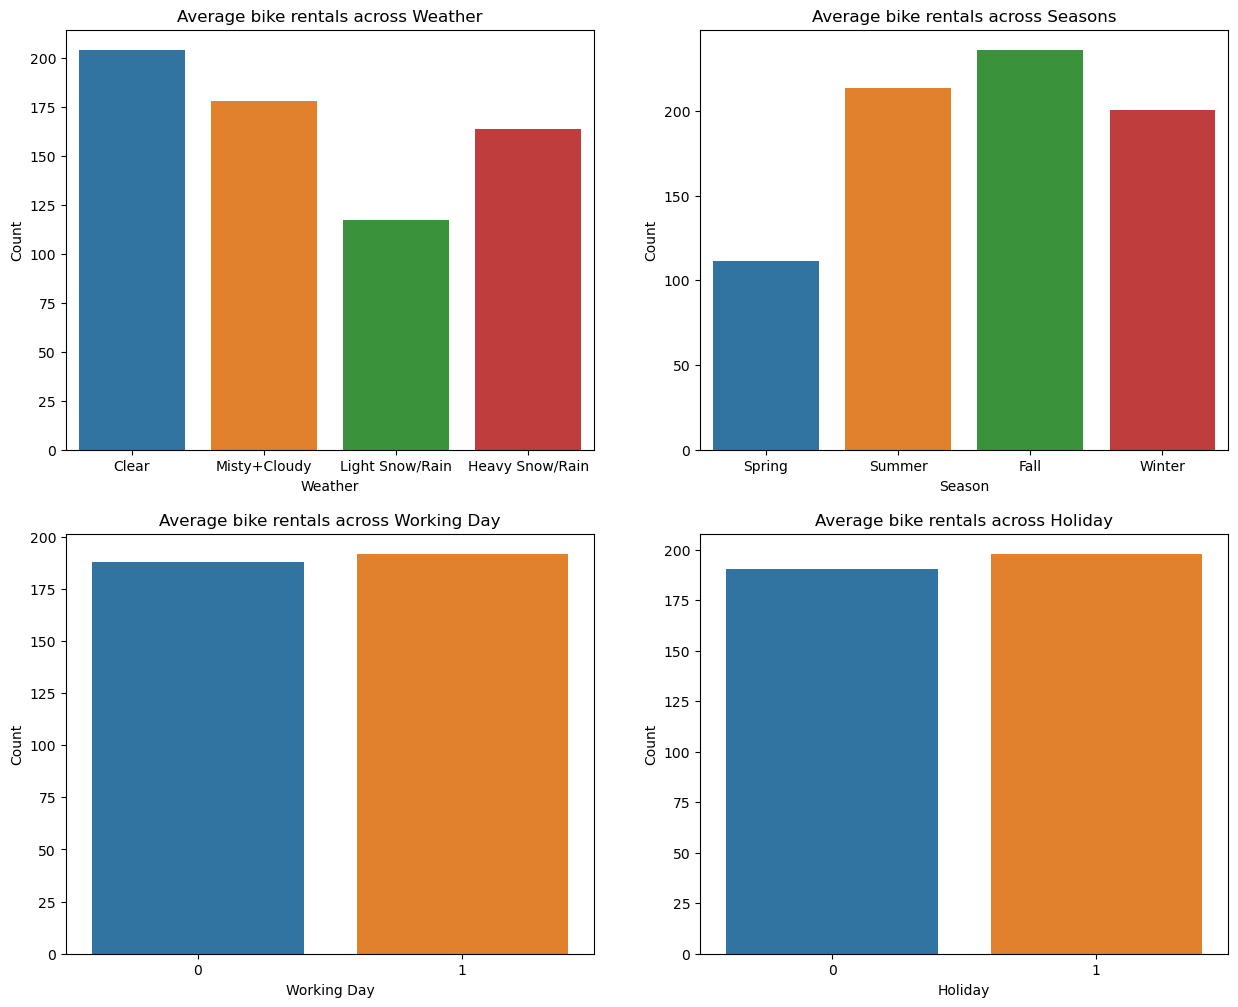

In [10]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_weather_data = pd.DataFrame(train_df.groupby(['weather'])['count'].mean()).reset_index()
sns.barplot(data=group_weather_data, x='weather', y='count', ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Average bike rentals across Weather')

axes = fig.add_subplot(2, 2, 2)
group_season_data = pd.DataFrame(train_df.groupby(['season'])['count'].mean()).reset_index()
sns.barplot(data=group_season_data, x='season', y='count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(2, 2, 3)
group_workingday_data = pd.DataFrame(train_df.groupby(['workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_workingday_data, x='workingday', y='count', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Average bike rentals across Working Day')

axes = fig.add_subplot(2, 2, 4)
group_season_data = pd.DataFrame(train_df.groupby(['holiday'])['count'].mean()).reset_index()
sns.barplot(data=group_season_data, x='holiday', y='count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')
plt.show()

##### Few Observations

1. Higher biker rentals as weather is more clear and sunny.
2. Just '1 hour' instance where there were rentals under heavy rain/snow condition. Two possibilities
    a. Could be an outlier
    b. Reservations made at a time when the weather was good. But weather conditions logged sometime later in the same hour when the conditions were heavy rains/snow
3. Bike reservations are lesser in Spring season compared to Summer and Fall


**Distribution vs. Temperature
Now let us see how number of bikes rented depends on the temperature**

C:\Users\drona\AppData\Local\Temp\ipykernel_30460\4154676845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w['temp_round'] = data_w['temp']//bin_size  # temperature values are binned into 4  ranges for working day
C:\Users\drona\AppData\Local\Temp\ipykernel_30460\4154676845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nw['temp_round'] = data_nw['temp']//bin_size  # temperature values are binned into 4  ranges for non-working day


Text(0.5, 1.0, 'Non-Working Days: Average Count given across temperature range')

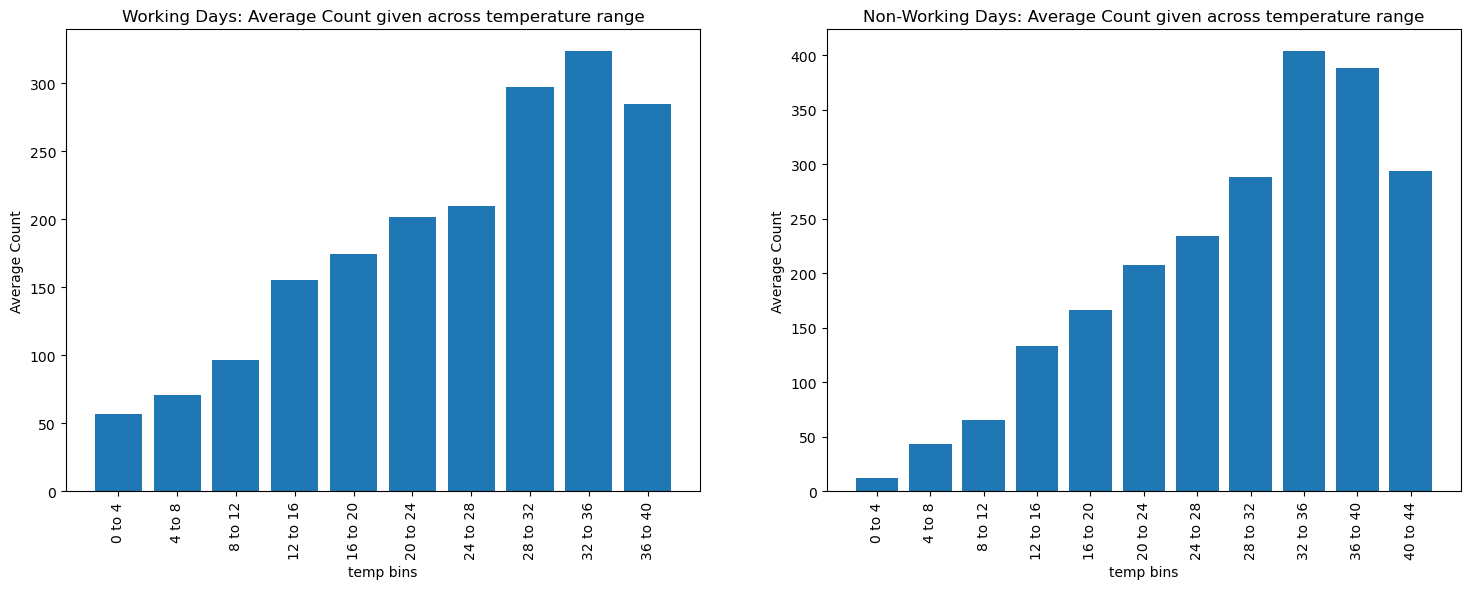

In [11]:
# Splitting data into working-day and non-working day
data_w = train_df[train_df.workingday==1]     # Get the Working day data from dataset
data_nw = train_df[train_df.workingday==0]    # Get the Non- Working day data from dataset

bin_size = 4
data_w['temp_round'] = data_w['temp']//bin_size  # temperature values are binned into 4  ranges for working day
data_nw['temp_round'] = data_nw['temp']//bin_size  # temperature values are binned into 4  ranges for non-working day

mean_count_vs_temp_w = data_w.groupby('temp_round')['count'].mean()     # Mean count by temp for working day  
mean_count_vs_temp_nw = data_nw.groupby('temp_round')['count'].mean()   # Mean count by temp for Non - working day
idx_w, idx_nw = range(len(mean_count_vs_temp_w)), range(len(mean_count_vs_temp_nw))  # index of working day ,index non working day
labels_w = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_w))]   
labels_nw = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_nw))]

fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
plt.bar(x=idx_w, height=mean_count_vs_temp_w)
plt.xticks(idx_w, labels_w, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Working Days: Average Count given across temperature range')

axes = fig.add_subplot(1, 2, 2)
plt.bar(x=idx_nw, height=mean_count_vs_temp_nw)
plt.xticks(idx_nw, labels_nw, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Non-Working Days: Average Count given across temperature range')


#### Observation

From the above histogram plot, we can see that there is a steady increase in the average bikes rented with temperature with a small decrease at the highest temperature bin

# Feature Engineering

Lets, split the datetime column into ['year','month', 'date', 'day', 'hour'] categories since the bike demand is more likely dependent on these individual categories. Creating these 5 additional category columns

In [12]:
# Splitting datetime object into month, date, hour and day category columns
train_df['year'] = [x.year for x in train_df.index]
train_df['month'] = [x.month for x in train_df.index]
train_df['date'] = [x.day for x in train_df.index]
train_df['hour'] = [x.hour for x in train_df.index]
train_df['day'] = [x.weekday() for x in train_df.index]

test_df['year'] = [x.year for x in test_df.index]
test_df['month'] = [x.month for x in test_df.index]
test_df['date'] = [x.day for x in test_df.index]
test_df['hour'] = [x.hour for x in test_df.index]
test_df['day'] = [x.weekday() for x in test_df.index]

category_list = ['year','month', 'date', 'hour', 'day']
for var in category_list:
    train_df[var] = train_df[var].astype('category')
    test_df[var] = test_df[var].astype('category')

Mapping 0 to 6 day indices to Monday to Saturday



In [13]:
# Mapping 0 to 6 day indices to Monday to Saturday 
day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
train_df['day'] = train_df['day'].map(day_dict)
test_df['day'] = test_df['day'].map(day_dict)
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


#### Hourly Distribution
Now that we have separated out the hour data, let us plot the distribution across hour in a day. Clearly, we expect to see some pattern in the distribution - for example, people would tend to rent bikes early in the morning and return them in the evening.

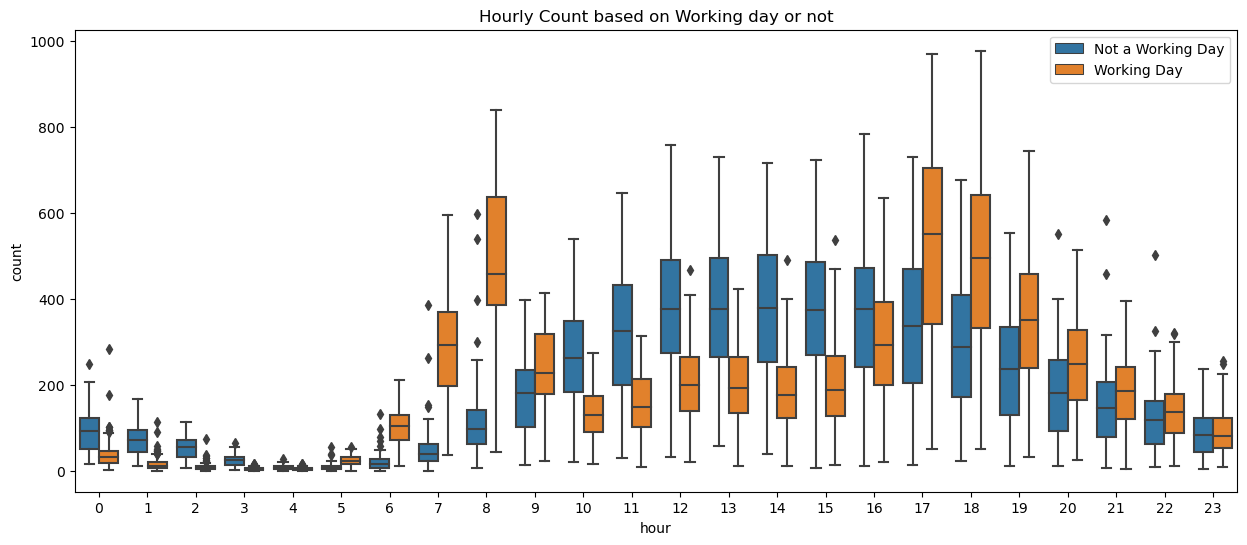

In [14]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=train_df, y='count', x='hour', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show()

Plotting average bike count for each hour as a function of various categories.

C:\Users\drona\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


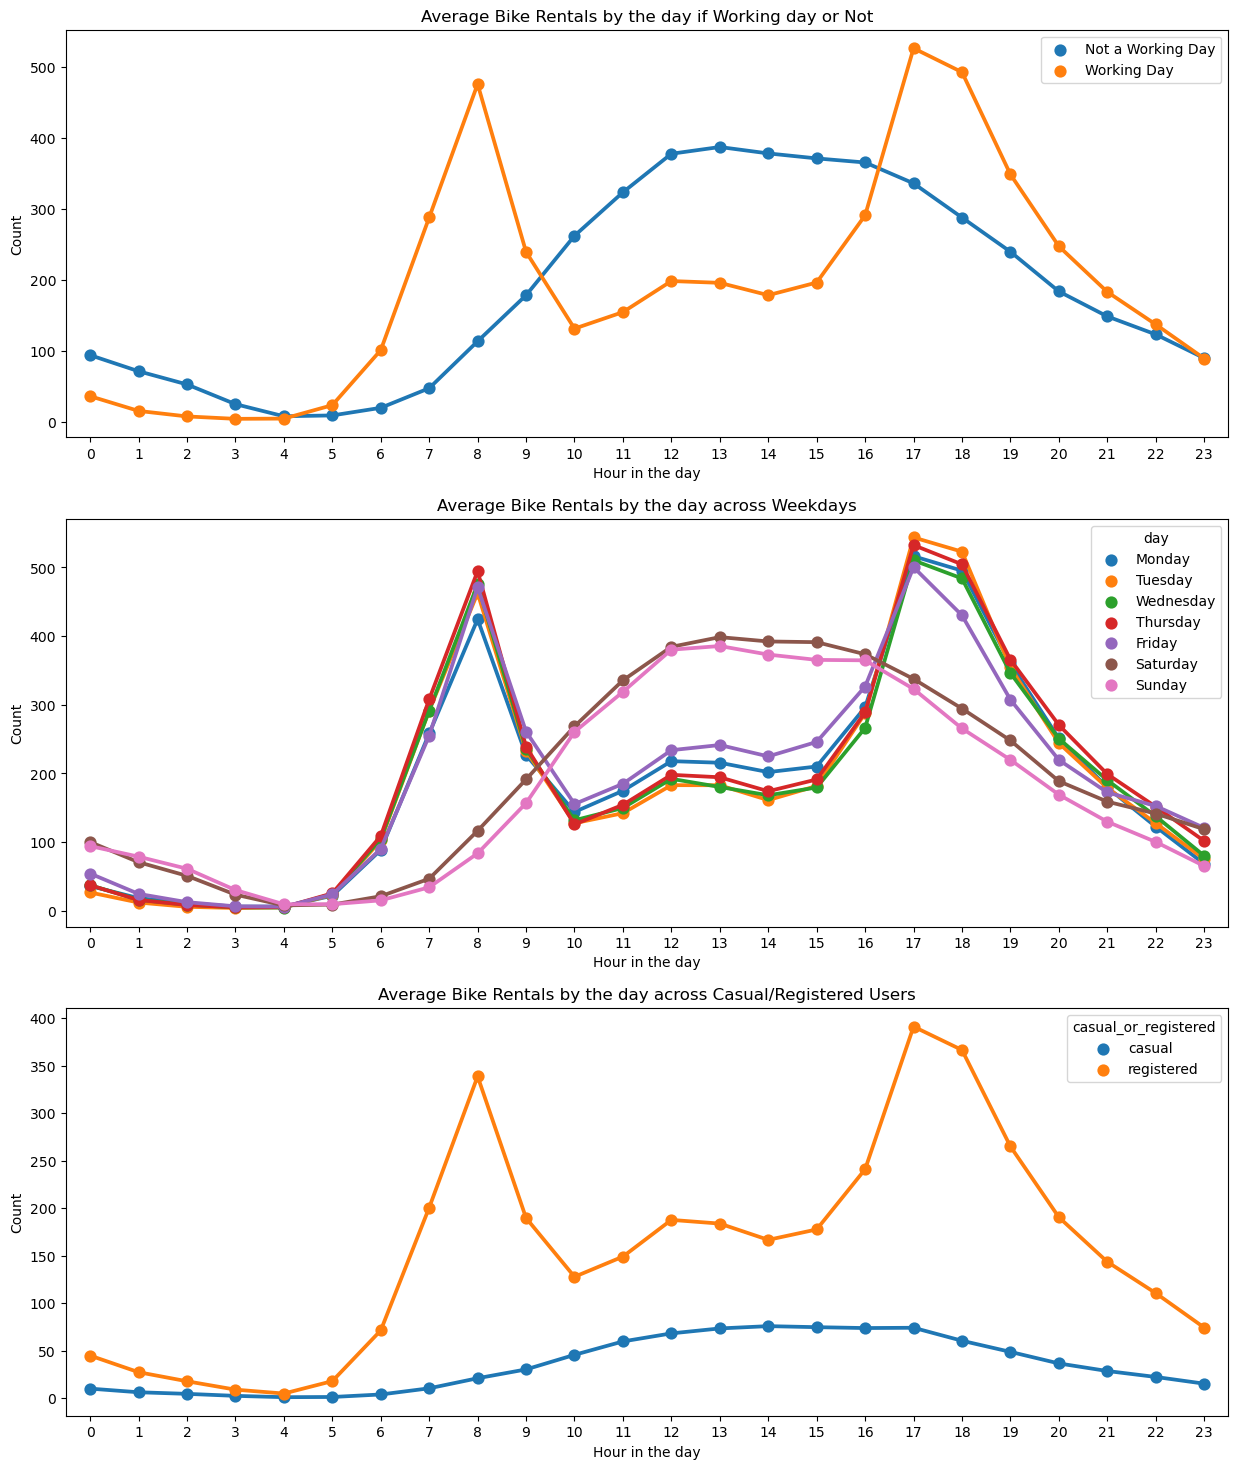

In [15]:
# Plots of average count across hour in a day for various categories

f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))
group_work_hour_data = pd.DataFrame(train_df.groupby(['workingday', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_work_hour_data, x='hour', y='count', hue='workingday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day if Working day or Not')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour_data = pd.DataFrame(train_df.groupby(['day', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_day_hour_data, x='hour', y='count', hue='day', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Weekdays')

df_melt = pd.melt(frame=train_df, id_vars='hour', value_vars=['casual', 'registered'], value_name='count', var_name='casual_or_registered')
group_casual_hour_data = pd.DataFrame(df_melt.groupby(['hour', 'casual_or_registered'])['count'].mean()).reset_index()
sns.pointplot(data=group_casual_hour_data, x='hour', y='count', hue='casual_or_registered', ax=axes[2])
axes[2].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Casual/Registered Users')

plt.show()

#### Heatmap Plot
Using heatmap plots of all the numerical features to obtain correlation of the bike rental with other numerical features

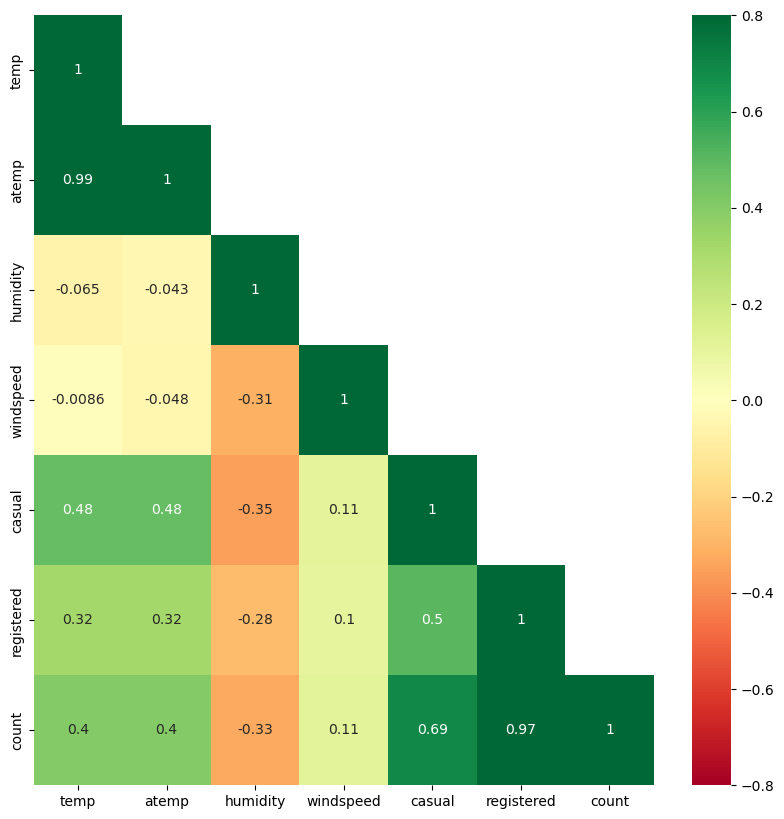

In [16]:
# Heatmap relative to all numeric columns
corr_matrix = train_df.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

##### Inferences from the above heatmap

1. temp (true temperature) and atemp (feels like temperature) are highly correlated as expected
2. count is highly correlated with casual and registered as expected since count = casual + registered
3. We see a positive correlation between count and temperature (as was seen in the regplot). This is probably only true for the range of temperatures provided
4. We see a negative correlation between count and humidity. The more the humidity, the less people prefer to bike
5. Not a great amount of correlation between humidity and temperature, though
6. Count has a weak dependence on windspeed

We have lots of categorical columns. We will transform each relevant and important categorical columns into binary vector columns. Later drop all the columns that are not required (redundant or very low correlation).

In [17]:
# Using numbers to represent categorical data to transform the categorical columns
season_inv_dict = {'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4}
weather_inv_dict = {'Clear':1, 'Misty+Cloudy':2, 'Light Snow/Rain':3, 'Heavy Snow/Rain':4}
day_inv_dict = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

train_df['season'] = train_df['season'].map(season_inv_dict)
train_df['weather'] = train_df['weather'].map(weather_inv_dict)
train_df['day'] = train_df['day'].map(day_inv_dict)

test_df['season'] = test_df['season'].map(season_inv_dict)
test_df['weather'] = test_df['weather'].map(weather_inv_dict)
test_df['day'] = test_df['day'].map(day_inv_dict)

# Dropping columns from the provided data set that are either highly correlated with the existing columns: 
# season with month, holiday and day with workingday, temp with atemp
# or poorly correlated with the target column: windspeed and date
drop_columns_train = ['casual','registered','atemp','windspeed']
train_df = train_df.drop(drop_columns_train, axis=1)

drop_columns_test = ['atemp','windspeed']
test_df = test_df.drop(drop_columns_test, axis=1)

print(train_df.head(n=3))
print(test_df.head(n=3))

                    season holiday workingday weather  temp  humidity  count  \
datetime                                                                       
2011-01-01 00:00:00      1       0          0       1  9.84        81     16   
2011-01-01 01:00:00      1       0          0       1  9.02        80     40   
2011-01-01 02:00:00      1       0          0       1  9.02        80     32   

                     year month date hour day  
datetime                                       
2011-01-01 00:00:00  2011     1    1    0   5  
2011-01-01 01:00:00  2011     1    1    1   5  
2011-01-01 02:00:00  2011     1    1    2   5  
                    season holiday workingday weather  temp  humidity  year  \
datetime                                                                      
2011-01-17 00:00:00      1       1          0       2  8.20        47  2011   
2011-01-17 01:00:00      1       1          0       2  8.20        44  2011   
2011-01-17 02:00:00      1       1         

Transforming all the categorical columns into binary columns...



In [18]:
# Transforming all the categorical columns into binary columns
season=pd.get_dummies(train_df['season'], prefix='season')
weather=pd.get_dummies(train_df['weather'], prefix='weather')
#month=pd.get_dummies(train_df['month'], prefix='month')
train_data=pd.concat([train_df,season, weather],axis=1)

season=pd.get_dummies(test_df['season'], prefix='season')
weather=pd.get_dummies(test_df['weather'], prefix='weather')
#month=pd.get_dummies(test_df['month'], prefix='month')
test_data=pd.concat([test_df,season,weather],axis=1)

print(train_data.columns)
print(test_data.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'count', 'year', 'month', 'date', 'hour', 'day', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'year', 'month', 'date', 'hour', 'day', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3'],
      dtype='object')


Dropping columns and the last binary vector column (which are fully correlated and can be expressed as a function of other columns)
Since predicted data doesn't have weather_4 dropping it from the train data also dropping season , weather and day from actual data as they are already converted to binary columns.



In [19]:
train_data = train_data.drop(['weather_4','season','weather'], axis=1)
test_data = test_data.drop(['weather','season'], axis=1)

print(train_data.columns)
print(test_data.columns)

Index(['holiday', 'workingday', 'temp', 'humidity', 'count', 'year', 'month',
       'date', 'hour', 'day', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3'],
      dtype='object')
Index(['holiday', 'workingday', 'temp', 'humidity', 'year', 'month', 'date',
       'hour', 'day', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3'],
      dtype='object')


# Fit the model to a portion of the training set, test on the rest and evaluate

In [20]:
x_train,x_test,y_train,y_test=train_test_split(train_data.drop('count',axis=1),train_data['count'],test_size=0.25,random_state=42)

In [21]:
models=[DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(n_neighbors = 5),BaggingRegressor(),LinearSVR()]
model_names=['DecisionTreeRegressor','LinearRegression','RandomForestRegressor','KNeighborsRegressor','BaggingRegressor','LinearSVR']
rmse=[]
d={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    #rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(y_test,test_pred)))
d={'Modelling Algo':model_names,'RMSE':rmse}   
d


C:\Users\drona\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Modelling Algo': ['DecisionTreeRegressor',
  'LinearRegression',
  'RandomForestRegressor',
  'KNeighborsRegressor',
  'BaggingRegressor',
  'LinearSVR'],
 'RMSE': [56.5597299448869,
  140.58070042180663,
  40.87552193343135,
  109.52663464472843,
  44.7700252545196,
  178.78289176240415]}

In [22]:
test_data=test_data.reset_index()

Based on above computation RandomForestRegressor has the least RMSE which is less than 50 so using the test data we have predicted.

In [23]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
test_pred=clf.predict(test_data.drop('datetime',axis=1))

d={'datetime':test_data['datetime'],'count':test_pred}
ans=pd.DataFrame(d)
ans

,datetime,count
0,2011-01-17 00:00:00,24.42
1,2011-01-17 01:00:00,21.67
2,2011-01-17 02:00:00,15.61
3,2011-01-17 03:00:00,10.32
4,2011-01-17 04:00:00,4.91
...,...,...
1707,2012-12-19 19:00:00,367.93
1708,2012-12-19 20:00:00,274.77
1709,2012-12-19 21:00:00,201.68
1710,2012-12-19 22:00:00,141.02


In [24]:
#Rmseval = np.sqrt(mean_squared_error(ans,y_test))
#print(Rmseval)

In [25]:
result = pd.merge(test_data, ans, how='inner', on='datetime', left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

In [26]:
result.head()

,datetime,holiday,workingday,temp,humidity,year,month,date,hour,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,count
0,2011-01-17 00:00:00,1,0,8.20,47,2011,1,17,0,0,1,0,0,0,0,1,0,24.42
1,2011-01-17 01:00:00,1,0,8.20,44,2011,1,17,1,0,1,0,0,0,0,1,0,21.67
2,2011-01-17 02:00:00,1,0,7.38,43,2011,1,17,2,0,1,0,0,0,0,1,0,15.61
3,2011-01-17 03:00:00,1,0,7.38,43,2011,1,17,3,0,1,0,0,0,0,1,0,10.32
4,2011-01-17 04:00:00,1,0,7.38,43,2011,1,17,4,0,1,0,0,0,0,1,0,4.91


In [27]:
y_test.head()

datetime
2011-02-11 19:00:00    101
2012-05-15 20:00:00    263
2011-09-04 16:00:00    337
2012-03-07 19:00:00    361
2012-10-04 16:00:00    497
Name: count, dtype: int64

In [28]:
ans.to_csv('submission.csv',index=False) # saving to a csv file for predictions on kaggle.